Duration = 0.03995966911315918


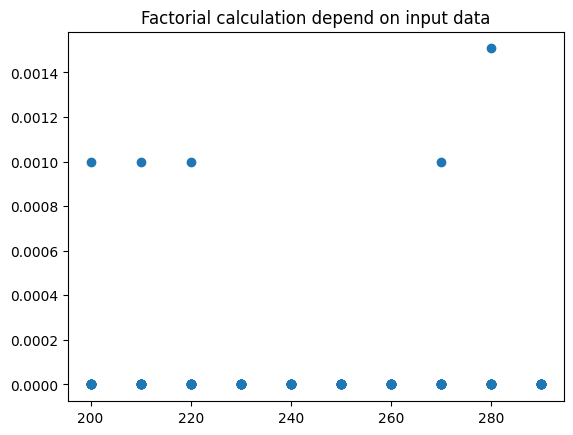

In [42]:
"""
Завдання 1
Створіть функцію для обчислення факторіала числа. Запустіть декілька завдань, використовуючи Thread, і заміряйте швидкість їхнього виконання, 
а потім заміряйте швидкість обчислення, використовуючи той же набір завдань на ThreadPoolExecutor. Як приклади використовуйте останні значення, 
від мінімальних і до максимально можливих, щоб побачити приріст або втрату продуктивності.
"""
import concurrent.futures
import requests
import threading
import time

import functools
import operator

def get_duration(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.time()
        res = func(*args, **kwargs)
        duration = time.time() - start_time
        print(f"Duration = {duration}")
        return res
    return wrapper



def save_duration(duration_arr):
    @functools.wraps(duration_arr)
    def get_duration(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            start_time = time.time()
            res = func(*args, **kwargs)
            duration = time.time() - start_time
            duration_arr.append((*args, duration))
            return res
        return wrapper
    return get_duration

durations_fact = []
@save_duration(durations_fact)
def factorial(n):
    return functools.reduce(operator.mul, range(1, n + 1))

@get_duration
def calculate_factorials(arr):
    with concurrent.futures.ThreadPoolExecutor(max_workers=15) as executor:
        results = executor.map(factorial, arr)
        #print(list(results))


arr = list(range(200, 300, 10)) * 10

calculate_factorials(arr)

import matplotlib.pyplot as plt
x, y = res = list(zip(*durations_fact))
plt.scatter(x, y)
plt.title("Factorial calculation depend on input data")
plt.show()

In [55]:
"""
Завдання 2
Створіть три функції, одна з яких читає файл на диску із заданим ім'ям та перевіряє наявність рядка «Wow!». 
Якщо файлу немає, то засипає на 5 секунд, а потім знову продовжує пошук по файлу. Якщо файл є, то відкриває його і шукає рядок «Wow!». 
За наявності цього рядка закриває файл і генерує подію, а інша функція чекає на цю подію і у разі її виникнення виконує видалення цього файлу. 
Якщо рядки «Wow!» не було знайдено у файлі, то засипати на 5 секунд. Створіть файл руками та перевірте виконання програми.
"""
import os
from threading import Thread
from threading import Event

def read_file(e, path):
    if not os.path.isfile(path):
        print('File is not found')
        time.sleep(5)
        print('Done...')
        return
    with open(path) as file:
        count = 0
        isFound = False
        while True:
            count += 1
            line = file.readline()
            if not line:
                break
            print("Line{}: {}".format(count, line.strip()))
            if 'Wow!' in line:
                isFound = True
                break
        if isFound:
            # raise event
            print('Found')
            e.set()
            
        else:
            print('Wow! is not found')
            time.sleep(5)
            print('Done...')

def main_wait(e):
    print('Main thread is waiting for reading file')
    event_is_set = e.wait()
    print('event set:', event_is_set)


if __name__ == '__main__':
    path = 'data/input.txt'
    e = threading.Event()
    t1 = threading.Thread(name='blocking', 
                      target=main_wait,
                      args=(e,))
    t1.start()

    time.sleep(5)
    t2 = threading.Thread(name='reading-file', 
                      target=read_file, 
                      args=(e, path))
    t2.start()

Main thread is waiting for reading file
Line1: sjkf sdfs
Line2: Wow! sfsd
Found
event set: True
